In [16]:
import math
import meep as mp
from meep import mpb

r = 0.2  # the rod radius
eps = 11.7  # the rod dielectric constant


geometry_lattice = mp.Lattice(
    size=mp.Vector3(1, 1),
    basis1=mp.Vector3(math.sqrt(3)/2 , 0.5),
    basis2=mp.Vector3(math.sqrt(3)/2, -0.5),
)

# Two rods per unit cell, at the correct positions to form a honeycomb
# lattice, and arranged to have inversion symmetry:
geometry = [
    mp.Cylinder(
        r,
        center=mp.Vector3(1/6,1/6),
        height=mp.inf,
        material=mp.Medium(epsilon=eps),
    ),
    mp.Cylinder(
        r,
        center=mp.Vector3(-1/6, -1/6),
        height=mp.inf,
        material=mp.Medium(epsilon=eps),
    ),
]

# The k_points list, for the Brillouin zone of a triangular lattice:
k_points = [    
    mp.Vector3(1 / -3, 1 / 3),  # K
    mp.Vector3(),  # Gamma
    mp.Vector3(y=0.5)  # M
]

k_interp = 3  # number of k_points to interpolate
k_points = mp.interpolate(k_interp, k_points)

resolution = 32
num_bands = 8

ms = mpb.ModeSolver(
    geometry_lattice=geometry_lattice,
    geometry=geometry,
    k_points=k_points,
    resolution=resolution,
    num_bands=num_bands,
)

ms.run_tm()
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list



Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (0.866025, -0.5, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.57735, -1, 0)
     (-0, 0, 1)
Geometric objects:
     cylinder, center = (0.166667,0.166667,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
     cylinder, center = (-0.166667,-0.166667,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 2 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
9 k-points
  Vector3<-0.3333333333333333, 0.3333333333333333, 0.0>
  Vector3<-0.25, 0.25, 0.0>
  Vector3<-0.16666666666666666, 0.16666666666666666, 0.0>
  Vector3<-0.08333333333333331, 0

In [17]:
md = mpb.MPBData(rectify=True, periods=3, resolution=32)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)

epsilon: 1-11.7, mean 4.10521, harm. mean 1.42306, 35.5469% > 1, 29.0207% "fill"
real part range: 1 .. 11.7


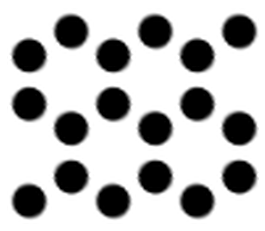

In [18]:
import matplotlib.pyplot as plt
plt.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

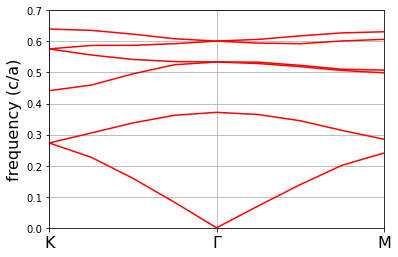

In [19]:
import matplotlib.pyplot as plt
import numpy as np 

fig, ax = plt.subplots()
x = range(len(tm_freqs))
ax.plot(tm_freqs, color='red')
ax.set_ylim([0, 0.7])
ax.set_xlim([x[0], x[2]])



points_in_between = (len(tm_freqs) - 3) / 2
tick_locs = [i*points_in_between+i for i in range(3)]
tick_labs = ['K', 'Γ', 'M']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)

plt.show()